# Univariate Analysis with Seaborn

You are presumably wondering: "Yeah, Matplotlib is great, it allows me to customize everything what come to my mind. But is there any other visualization library which is able to conjure up good-looking graph with less code? 

Ladies and gentlemans, it´s **Seaborn** library which is built on top of the `Matplotlib`.

The strength of Seaborn compound from the ability to create attractive, aesthetically pleasing plots integrating `Pandas DataFrame`s functionalities. Hm, what does it mean? I suppose, you remember how we visualize data using Matplotlib. In order to create plot we always needed to 'extract' a Series of the DataFrame and then we were able to apply some plotting function. Seaborn library is another story, thus it operates on the whole dataset, intelligently use labels of the `DataFrame` and internally performs necessary steps. Seaborn makes creating visualizations very easy and intuitive by using high-level functions. 

# 1. Importing Seaborn library and loading the data

Firstly, we import Seaborn library and give it conventional alias `sns`. 

In [2]:
# Importing Seaborn library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

There are 18 example datasets provided by Seaborn. After completing this notebook, you can choose few of them that seem interesting to you and and try to apply your gained knowledge about visualization using Seaborn. 

To get a list of available datasets you can use `get_dataset_names()` function.

In [3]:
# Print available example datasets
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

## 1.2 Setting the theme



We can go with 'penguins' dataset that can be loaded using `load_dataset()` function which returns `Pandas` DataFrame.

This dataset consists of 7 attributes and 344 observations about penguins from islands in the Palmer Archipelago in Antarctica.

**Attributes explanation**
- species: species of a penguin (Adelie, Gentoo and Chinstrap)
- island: the name of an island (Biscoe, Dream, Torgersen)
- bill_length_mm: the length of the bill (in mm)
- bill_depth_mm: the depth of the bill (in mm)
- flipper_length_mm: the length of the flipper (in mm)
- body_mass_g: body mass (in grams)
- sex: the gender of a penguin

**photo**

In [4]:
# Load the data
penguins = sns.load_dataset('penguins')

In [109]:
# Take a look at the first 5 rows
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [6]:
# Explore statistics information about the data
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


**description**

In [7]:
# Explore whether there are some missing values
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

**description**

In [8]:
# Remove missing values
penguins.dropna(inplace = True)

**figure size, style sheets**

In [9]:
# Set the parameters
import matplotlib.pyplot as plt
params = {'figure.figsize':(13,8),
         'axes.labelsize':13,
         'axes.titlesize':16,
         'xtick.labelsize':11,
         'ytick.labelsize':11
         }
plt.rcParams.update(params)
sns.set_style('darkgrid')

In [10]:
sns.set(rc={'figure.figsize':(13,9)})

**neskor**

Firstly, we discuss how you can control **aesthetic of a figure** in other words **theme** based on your needs and preferences. It always depends on whether you are exploring the data for yourself or you want to communicate your insights to an audience. During your exploratory part, your visualizations do not need to be perfect and polished as long as they serve the purpose of revealing necessary and useful insight. 

But if your visualization will be presented to others, it is appropriate to take care of plot´s appearance in order to make it appealing and catching the attention. This is true also in the case of theme. Let´s look at the one of the example dataset and try to change the theme of created visualization.

# 2. Numerical variables

## Histogram

We´ll look at the distribution of our data using `displot()` function where we specify parameters such as `data` and `x` that define a position on x-axis. 

This function uses the same underlying code as `histplot()` function. Moreover it provides different approaches for visualizing the distribution. The histogram will be drawn by default. But we can choose a particular approach with `kind` parameter:  
`kind = 'hist'`   
`kind = 'kde'`  
`kind = 'ecdf'`  

All of these approaches to visualize distribution have very own function in `distribution module` and belong to distribution plots category. We´ll discuss all approaches later on. 

Now let´s see how we can display the distribution of the length of penguins´s bills. Seaborn´s function `displot()` returns Matplotlib´s FacetGrid object. You can assing the resulting object to ax variable to be able add things such as title or axes labels.

Another way is to use `plt.title()`, `plt.xlabel()` and `plt.ylabel()`.

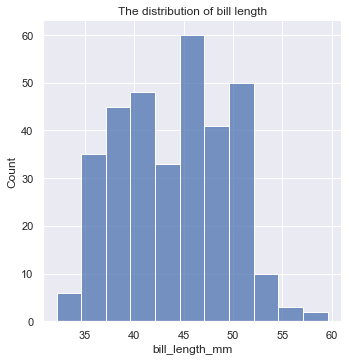

In [11]:
# Create a histogram of 'bill_length_mm'
ax = sns.displot(data = penguins, x = 'bill_length_mm');
ax.set(title = 'The distribution of bill length');

As you can see, Seaborn automatically annotate labels according to defined parameters. As we can see from plot, most common bill length is about 45 mm. There are very few penguins that have bill length less than 10 mm. 

As we already learned, it is always appropriate to experiment and try different numbers of bins as well as change the size of bins. By default, `displot()` and `histplot()` plotting functions determine the size of the bins based on the number of observations and the variance. 

If you want to zoom in into the particular area of a histogram, you can do so by limiting axis using Matplotlib´s `xlim` (alteratively `ylim`). The options are:

- `plt.xlim(left, right)` - setting values for the left and the right limit
- `plt.xlim(left)` - setting a value only for left limit
- `plt.xlim(right)` - setting a value only for right limit

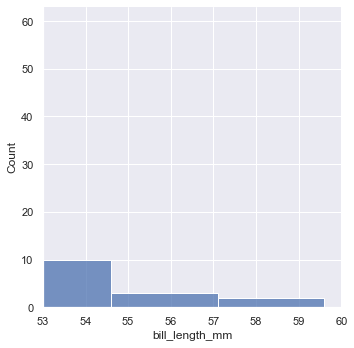

In [100]:
# A displot of 'bill_length_mm' with specified axis limits from value 53 to 60
sns.displot(data = penguins, x = 'bill_length_mm')
plt.xlim(53,60);

Changing the size of the bins can be acomplished with `binwidth` parameter. If we set `binwidth` = 2, each bin will coumpound observations in the range of 2 milimeters: 

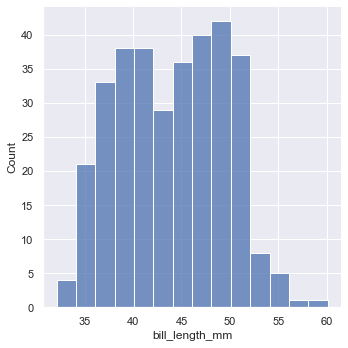

In [12]:
# Histogram with specified binwidth
sns.displot(data = penguins, x = 'bill_length_mm', binwidth = 2);
# Change the size of the bins yourself and observe the output

Alternatively, we can control the number of bins. There is no right answer to: "So, what number of bins should I set?". 

It always depends on the data and our aim is to choose the most appropriate one that describes the data the best. If we wouldn´t  try to alter the number of bins during the exploration, we might lose important patterns. 

You can assign the number of bins to `bins` parameter.

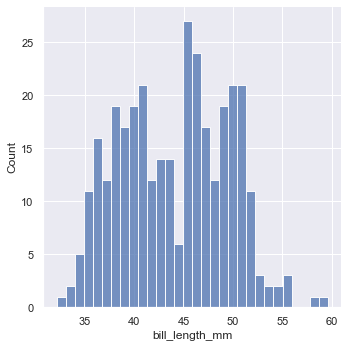

In [76]:
# Histogram with specified number of bins
sns.displot(data = penguins, x = 'bill_length_mm', bins = 30);
# Again, replace the number of bins and observe the output

In the above histogram, we can see that the number of bins is too big, since the gap appeared after value 55. Try change this number yourself and observe the output.

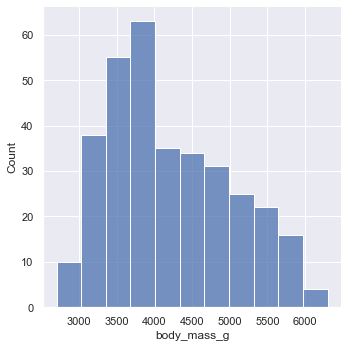

In [14]:
# TASK 1 >>> Create a histogram showing the distribution of penguins´s body mass ('body_mass_g' variable)
#        >>> Just define data and a variable and let Seaborn create the default plot
sns.displot(data = penguins, x = 'body_mass_g');

>What can you say about the distribution of body mass? Does the default bins correctly captured pattern in data? What is the most common weight of penguins? 

## Plotting the distribution using KDE plot

KDE abbreviation stands for Kernel Density Estimate and using this approach we can create distribution using continuous probability density curve. 

**dopisat**

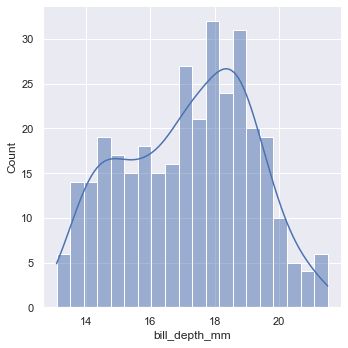

In [15]:
sns.displot(data = penguins, x = 'bill_depth_mm', bins = 20 ,kde = True);

**description**

## Boxplot

Now we´ll look at the distribution of penguins´s body mass using boxplot. 

Seaborn´s `boxplot()` function takes several parameters, please, refer to the documentation [here](https://seaborn.pydata.org/generated/seaborn.boxplot.html) to learn more. 

Below you can see how the default boxplot looks like. We passed our dataset to `data` parameter and 'body_mass_g' variable as input of x parameter. 

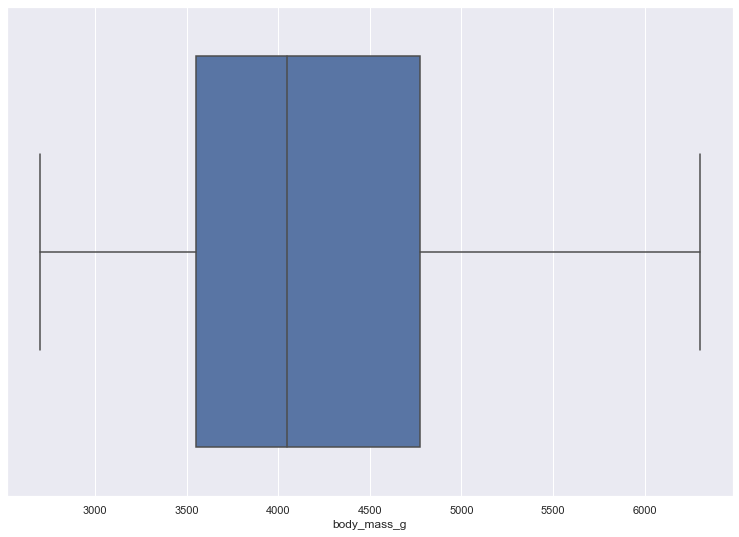

In [16]:
# Boxplot of 'body_mass_g' variable
sns.boxplot(data = penguins, x = 'body_mass_g');

In our example we customize color, width of boxplot and width of lines. Changing the color of line presenting median value can be useful in order to emphasize it. 

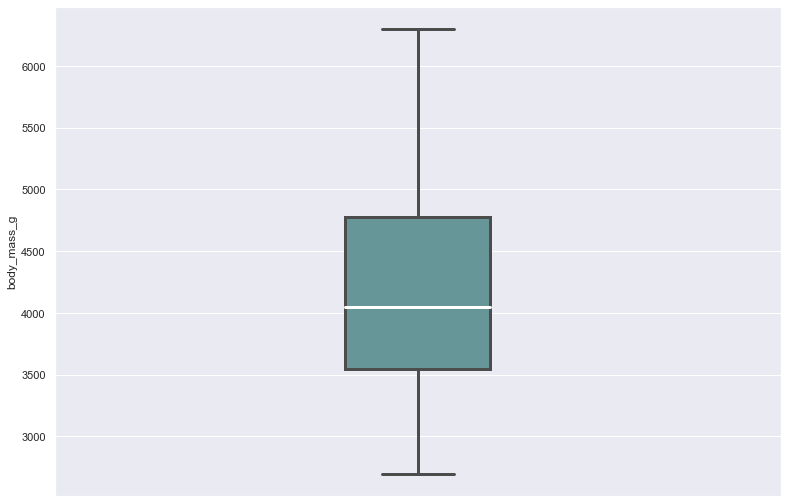

In [17]:
# Small customizations of boxplot
sns.boxplot(data = penguins, 
            y = 'body_mass_g',
            color = 'cadetblue',
            width = 0.2,
            linewidth = 3,
            medianprops={'color':'white'});

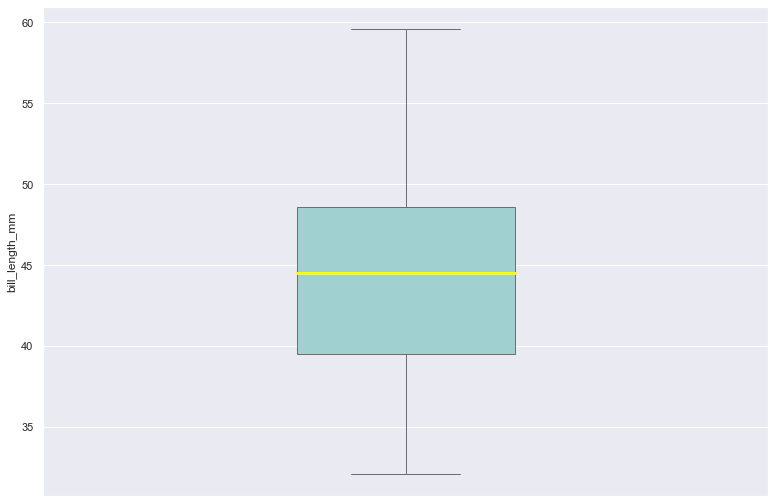

In [18]:
# TASK 2 >>> Create a boxplot on 'bill_length_mm' variable
#        >>> Set color as hexadecimal code: '#98D8D8',
#        >>> Set width of the box to 0.3
#        >>> Set width of a line to 1
#        >>> Change a color of median line to be yellow and of width 3 
#            (you can specify medianprops properties within boxplot() function or outside this function)

sns.boxplot(data = penguins, y = 'bill_length_mm', color = '#98D8D8', width = 0.3, linewidth = 1, 
            medianprops={'color':'yellow','linewidth':3});

### Customizing boxplots
**uvod z tohoto spomenut v Intro to Matplotlib** **plus spomenut aj ako sa zadavaju farby**

If you want to further customize a boxplot, you can do so with Matplotlib´s help.

Since Seaborn´s boxplot is fancier version of Matplotlib´s boxplot, you can use the same parameters to control boxplot´s appearance. For example, changing the style of box (`boxprops`), whiskers (`whiskerprops`), emphasizing median value (`medianprops`) or outliers (`flierprops`) if present. 

You can specify and pass these properties within the dictionary and then insert it into the boxplot plotting function. These `props` dictionaries refer to class [`Line2D`](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) and you can further customize only those parameter that are present in this class.

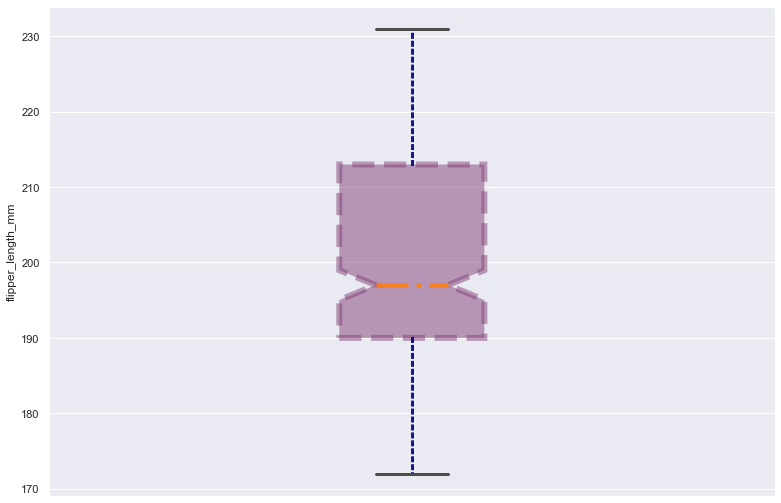

In [19]:
# Customized boxplot
box_cust = dict(color = '#834177',                # customizing properties of the box 
                alpha = 0.5, 
                linestyle = 'dashed', 
                linewidth = 6)

whisker_cust = dict(color = '#000184',            # customizing properties of whiskers
                    alpha = 0.9,                  # the transparency
                    linestyle = 'dotted',         # the style of the line
                    linewidth = 3,                # the width of the line
                    dash_capstyle = 'projecting') # setting the cap style for dashed line

median_cust = dict(color = '#ff7f0e',
                  alpha = 0.9,
                  linestyle = 'dashdot',
                  linewidth = 5)

ax = sns.boxplot(data = penguins, 
                y = 'flipper_length_mm',
                width = 0.2,
                linewidth = 3,
                boxprops = box_cust,
                whiskerprops = whisker_cust,
                medianprops = median_cust,
                notch = True                      # noteched boxplot (notch represent the confidence interval around median) 
               );

## Swarmplot

`swarmplot()` plotting function can be useful if we want to better see the distribution of values. In this case, each data point will be drawn and adjusted to avoid overlapping of values. You can, of course, create swarmplot on its own, but it´s nice to see drawn values on the top of distribution created with boxplot. 

There is one disadvantage of the swarmplot: if you have dataset with large number of observations, let´s say in thousands, there will be huge overlapping of data points. In the case of penguins dataset, swarmplot is a good choice of plotting method, we can nicely see drawn observations. 

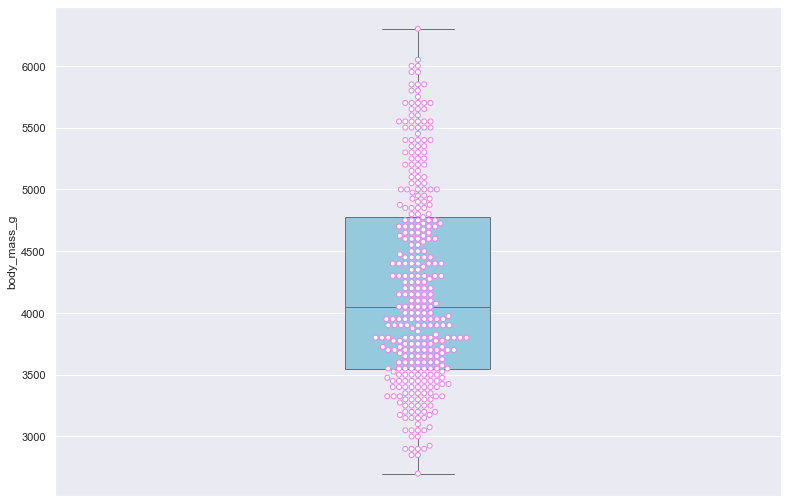

In [20]:
# Distribution of data displayed with boxplot and swarmplot
sns.boxplot(data = penguins,
            y = 'body_mass_g',
            color = 'skyblue',
            width = 0.2,
            linewidth = 1)
sns.swarmplot(data = penguins, 
              y = 'body_mass_g',
              color = 'white',
              edgecolor = 'violet',                     # the color of line around data point
              linewidth = 1);                           # The width of line that frame data point

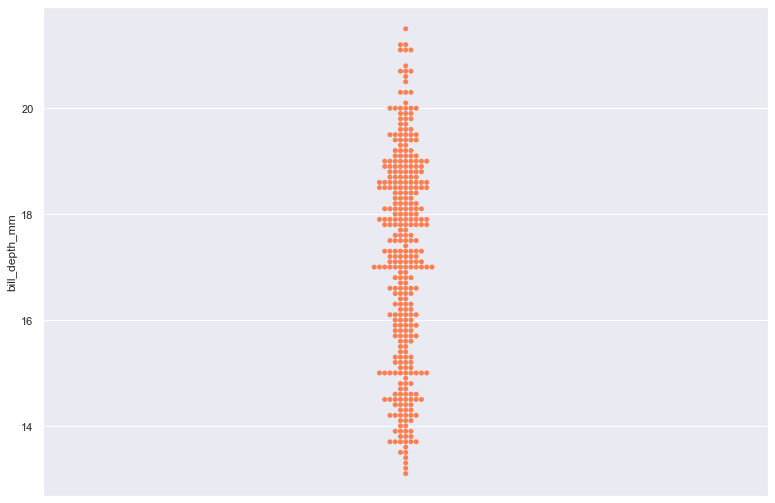

In [21]:
# TASK 3 >>> Create a swarmplot of 'bill_depth_mm' variable
#        >>> Set color of data points to 'coral'
sns.swarmplot(data = penguins, y = 'bill_depth_mm', color = 'coral');

> Could you exactly say where the majority of data points lies based on drawn data points? Sometimes, judging the distribution´s shape from swarmplot can be tricky. To be sure, it´s better to create swarmplot in conjunction with boxplot. 

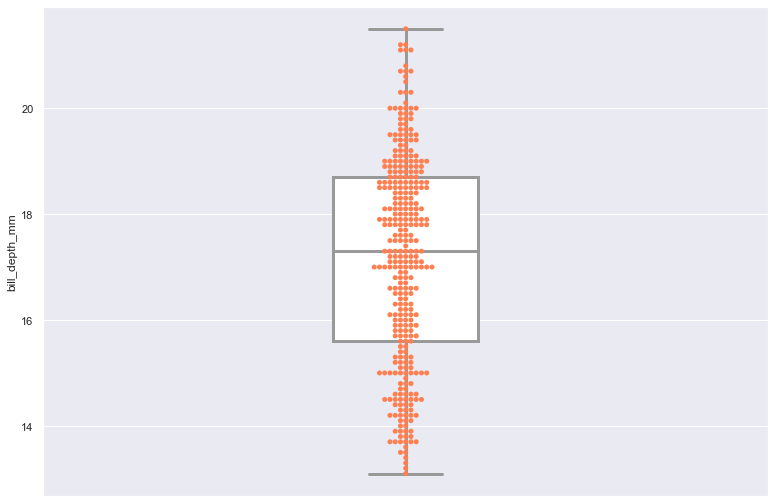

In [22]:
# TASK 4 >>> Create a boxplot of 'bill_depth_mm' variable
#        >>> Set width of boxplot to 0.2, width of line to 3 and color to 'white'
#        >>> Plot a swarmplot right after a boxplot (just copy and paste line of code you created in TASK 3)
sns.boxplot(data=penguins, y = 'bill_depth_mm', width = 0.2, color = 'white', linewidth = 3)
sns.swarmplot(data = penguins, y = 'bill_depth_mm', color = 'coral');

## Stripplot

Stripplots are very similar to swarmplots since also show all of the data. There is the same disadvantage of the data overlapping although you add some random noise (jitter) among values. Sometimes it´s hard to tell what is the distribution of data without additional representation of the underlying distribution (for instance, created with a boxplot). 

You can add amount of jitter using `jitter` parameter, while you have 2 options:
- set `jitter = True` for a good default amount of jitter
- specify amount of jitter 

Stripplots can be also useful for indicating outliers in the data. 

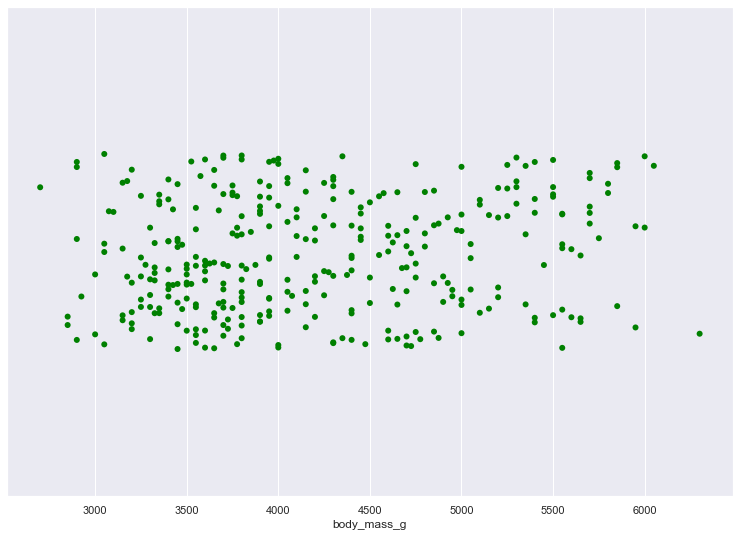

In [23]:
# Stripplot of 'body_mass_g' variable
sns.stripplot(data = penguins, 
              x = 'body_mass_g', 
              color = 'green', 
              jitter = 0.2, 
              size = 6);

Since we do not have so many observations, we can better estimate the distribution of the data because they do not overlap. Here, we can take into the consideration the density of data points which can gives us a good approximation of the shape. You can see, that there are more data points in the range of 3200-3800 grams compared to the rest of data points. After that, data points become more sparse. Based on that, we would say that the distribution seems to be right-skewed. In most cases, it would be not appropriate assuming the distribution only from stripplot because it can be misleading. Therefore, always visualize data using several plotting approaches. 

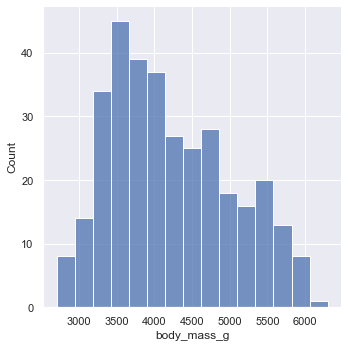

In [24]:
# Histogram of 'body_mass_g' variable 
sns.displot(data = penguins, x = 'body_mass_g', bins = 15);

# 3. Categorical variables

## 3.1 Catplot

To create a visualization of a categorical variable you can use `catplot()` plotting function. This is a Figure-level interface which allows you to specify certain plot type such as boxplot using `kind` parameter. 

For example, if you want to visualize the number of occurences of observations based on the specific category the code would be:

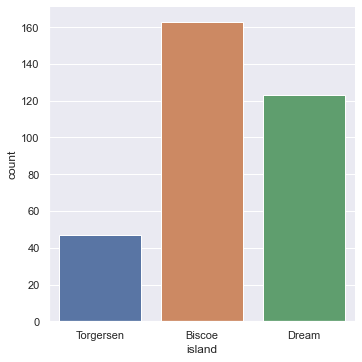

In [25]:
# The count of penguins based on the island
sns.catplot(data = penguins,
           x = 'island',
           kind = 'count');

This is the default countplot you get. The visual appearance of a countplot is similar to a histogram, the values are placed within the respective bars.

### 3.1.1 Countplot

Alternatively, we can use Axis-level ploting function `sns.countplot()`.

**padding between xlabel and xticks**

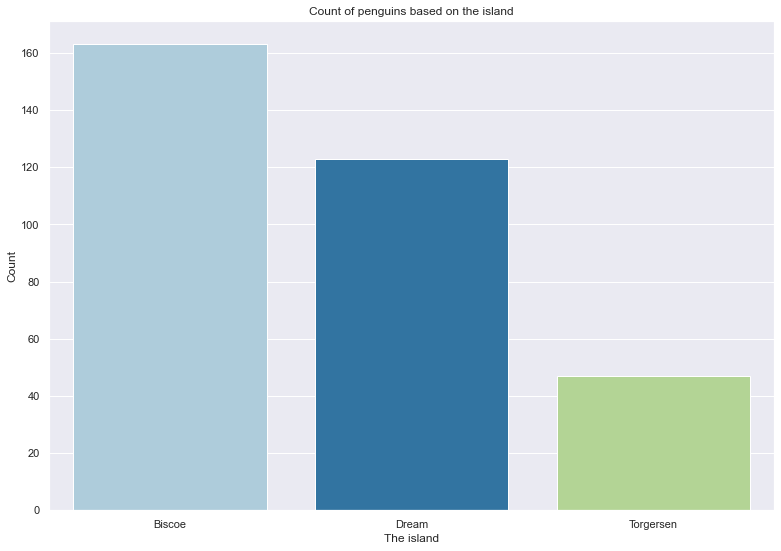

In [26]:
# Create a countplot of 'island' variable
ax = sns.countplot(data = penguins, 
                   x = 'island',
                   order = penguins.island.value_counts().index, # Order categories by their value counts
                   palette = 'Paired')
ax.set(title = 'Count of penguins based on the island', 
       xlabel = 'The island',
       ylabel = 'Count');

Here we order the categories based on their values in descending order. Another way to changing the order based on your preference is to define categories in the list:
```order = ['Biscoe','Dream','Torgersen']```

All of customizations we did are aplicable also with `catplot()`.

**popisat height a aspect**

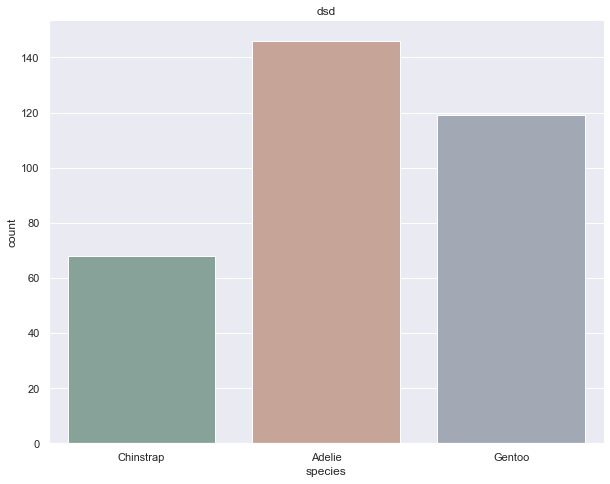

In [27]:
# TASK >>> Display count of penguins with respect to species
#      >>> Use catplot() plotting function
#      >>> Order the species in the following way: Chinstrap, Adelie, Gentoo
#      >>> Set the saturation of colors to 0.3
sns.catplot(data = penguins,
           x = 'species',
           kind = 'count',
           order = ['Chinstrap','Adelie','Gentoo'],
           palette = 'Set2',
           saturation = 0.3,
           height = 6.5,
           aspect = 1.3)
plt.title('dsd');

# 5. Tasks

Now it´s your turn to create some visualization of the Bank Marketing dataset. The data is related woth marketing campaign of the Portuguese banking institution that was performed via phone communication with clients of the bank. Let´s look at attributes and do some preprocessing. 

**Attributes explanation:**

Bank client data:
- age
- job : type of job
- marital : marital status
- education
- default: has credit in default?
- housing: has housing loan?
- loan: has personal loan?

Related with the last contact of the current campaign:
- contact: contact communication type
- month: last contact month of year
- day_of_week: last contact day of the week
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:
- campaign: number of contacts performed during this campaign and for this client
- pdays: number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client
- poutcome: outcome of the previous marketing campaign

Social and economic context attributes
- emp.var.rate: employment variation rate - quarterly indicator
- cons.price.idx: consumer price index - monthly indicator
- cons.conf.idx: consumer confidence index - monthly indicator
- euribor3m: euribor 3 month rate - daily indicator
it is calculated by eliminating the highest 15% and the lowest 15% of the interest rates submitted and calculating the arithmetic mean of the remaining values
- nr.employed: number of employees - quarterly indicator

Target variable:
- y - has the client subscribed a term deposit?

In [40]:
# Load the data 
data = pd.read_csv('Datasets/bank_data.csv',sep = ';')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [41]:
# Let´s rename some of variables
data.rename(columns = {'marital':'marital_status','default':'default_credit','housing':'house_loan',
                      'contact':'contact_type','duration':'contact_duration','campaign':'number_of_contacts',
                      'pdays':'days_passed','previous':'number_previous_contact','poutcome':'previous_campaign_outcome',
                      'emp.var.rate':'emp_variation_rate','cons.price.idx':'cpi','cons.conf.idx':
                      'cci','euribor3m':'euribor_rate','nr.employed':'no_employees','y':'target'},
           inplace = True)

In [42]:
# Examine summary statistics
data.describe()

,age,contact_duration,number_of_contacts,days_passed,number_previous_contact,emp_variation_rate,cpi,cci,euribor_rate,no_employees
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [43]:
# Check for missing values
data.isnull().sum()

age                          0
job                          0
marital_status               0
education                    0
default_credit               0
house_loan                   0
loan                         0
contact_type                 0
month                        0
day_of_week                  0
contact_duration             0
number_of_contacts           0
days_passed                  0
number_previous_contact      0
previous_campaign_outcome    0
emp_variation_rate           0
cpi                          0
cci                          0
euribor_rate                 0
no_employees                 0
target                       0
dtype: int64

In [44]:
# Check for duplicated data
duplicated_rows = data[data.duplicated()]
duplicated_rows

,age,job,marital_status,education,default_credit,house_loan,loan,contact_type,month,day_of_week,...,number_of_contacts,days_passed,number_previous_contact,previous_campaign_outcome,emp_variation_rate,cpi,cci,euribor_rate,no_employees,target
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


There are 12 duplicated rows in the dataset, that will be removed. 

In [45]:
# Remove duplicated rows
data.drop_duplicates(inplace = True)

In [46]:
# Examine data types of variables
data.dtypes

age                            int64
job                           object
marital_status                object
education                     object
default_credit                object
house_loan                    object
loan                          object
contact_type                  object
month                         object
day_of_week                   object
contact_duration               int64
number_of_contacts             int64
days_passed                    int64
number_previous_contact        int64
previous_campaign_outcome     object
emp_variation_rate           float64
cpi                          float64
cci                          float64
euribor_rate                 float64
no_employees                 float64
target                        object
dtype: object

It seems that data type of numerical variables has been correctly recognized by Python. All non-numerical variables have object data type, so let´s them convert to categories.

In [36]:
# Select all variables that need to be converted
to_category = ['job','marital_status','education','default_credit','house_loan', 
               'loan','contact_type','month','day_of_week', 'previous_campaign_outcome']

In [47]:
# Convert them to category data type
for col in to_category:
  data[col] = data[col].astype('category')

Days and months are recorded as their abbreviations. Let´s do mapping with new values of their full name.

In [49]:
# Create a dictionary with original values and corresponding new values for days
mapping_days = {'mon':'Monday','tue':'Tuesday','wed':'Wednesday','thu':'Thursday','fri':'Friday'}

In [51]:
# Map new values to column 'day_of_week'
data.day_of_week = data.day_of_week.map(mapping_days)

In [53]:
# Create a dictionary with original values and corresponding new values for months
mapping_months = {'mar':'March', 'apr':'April','may':'May','jun':'Jun','jul':'Jul','aug':'August',
                  'sep':'September','oct':'October','nov':'November','dec':'December'}

In [55]:
# Map new values to column 'month'
data.month = data.month.map(mapping_months)

## 5.1 Numerical variables

Let´s start with numerical variables and explore the distribution of data points. 

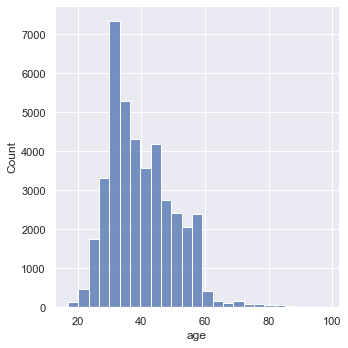

In [78]:
# TASK >>> Create a histogram of 'age' variable
#      >>> Set the number of bins to 25
sns.displot(data = data, x = 'age', bins = 25);

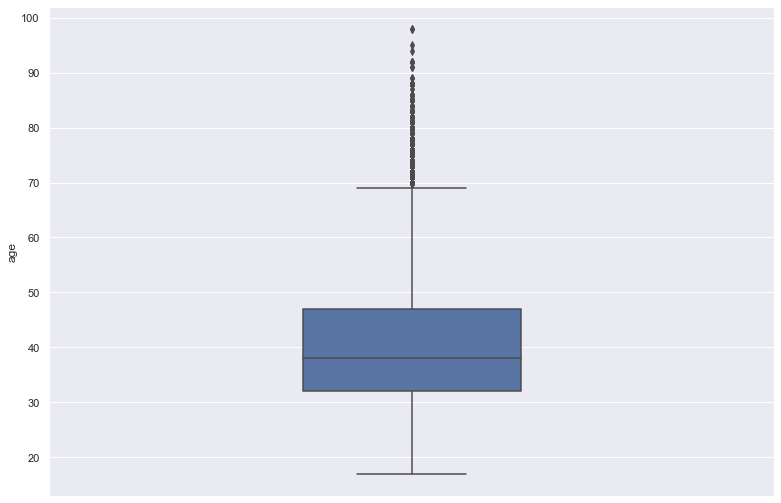

In [72]:
# TASK >>> Create a boxplot of 'age' variable
#      >>> Assign variable 'age' to y parameter
#      >>> Set the width of a box to 0.3
sns.boxplot(data = data, y = 'age', width = 0.3);

The values of the variable 'contact_duration' are recorded in seconds. Run the below line to convert them to minutes.

In [80]:
# Converting seconds to minutes
data.contact_duration = data.contact_duration.apply(lambda x: x / 60)

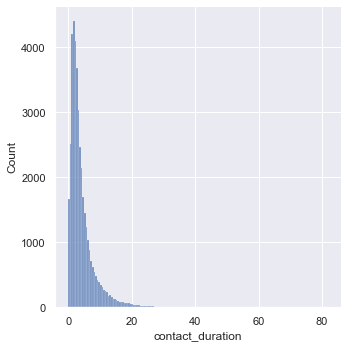

In [94]:
# TASK >>> Create a histogram of 'contact_duration'
#      >>> Set the widht of bins to 0.5, so every bin compound call duration of 50 seconds
sns.displot(data = data, x = 'contact_duration', binwidth = 0.5);

There are some records where the call was not performed, so corresponding values are of value 0. Let´s look how many rows have not recorded the duration and drop them since they will not provide us any useful information.

In [93]:
# Print only those rows where 'contact_duration' is 0
data[data['contact_duration'] == 0]

,age,job,marital_status,education,default_credit,house_loan,loan,contact_type,month,day_of_week,...,number_of_contacts,days_passed,number_previous_contact,previous_campaign_outcome,emp_variation_rate,cpi,cci,euribor_rate,no_employees,target
6251,39,admin.,married,high.school,no,yes,no,telephone,May,Tuesday,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23031,59,management,married,university.degree,no,yes,no,cellular,August,Tuesday,...,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,April,Friday,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,May,Monday,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no


In [95]:
# Get the index of rows that should be dropped
index_rows_to_drop = data[data['contact_duration'] == 0].index

In [96]:
# Drop those rows from the dataframe
data.drop(index_rows_to_drop, inplace = True)

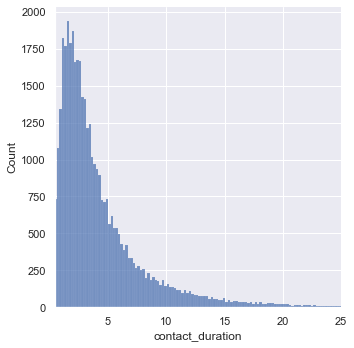

In [101]:
# TASK >>> Recreate a histogram of 'contact_duration'
#      >>> Zoom in and set the x-axis limit from 0.5 to 25 minutes 
sns.displot(data = data, x = 'contact_duration')
plt.xlim(0.5,25);

We already saw that the distribution of data points can be visualize using a stripplot. When we plotted some variable of panguins dataset, we could have nicely observed each data point plotted in a Figure and there was minimal overlapping of values. Now create a stripplot of 'contact_duration' variable from Bank marketing dataset to see how a stripplot looks like when you have thousands of records available. 

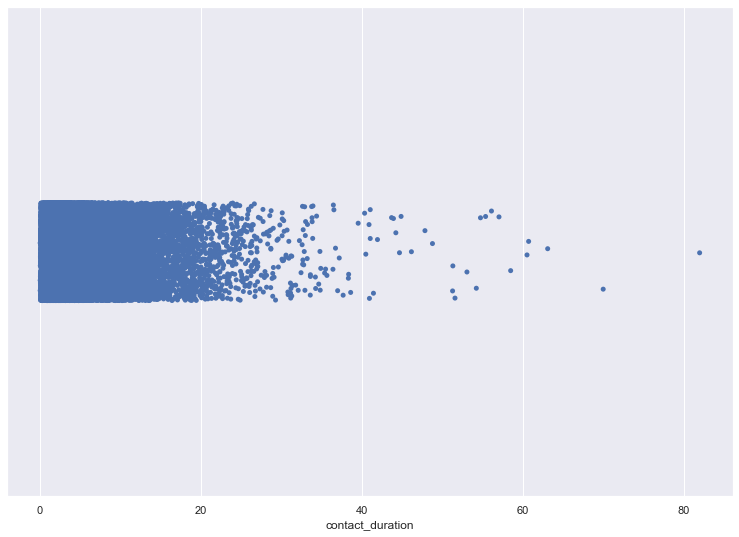

In [105]:
# TASK >>> Create a stripplot of 'contact_duration' variable
sns.stripplot(data = data, x = 'contact_duration');

## 5.2 Categorical variables

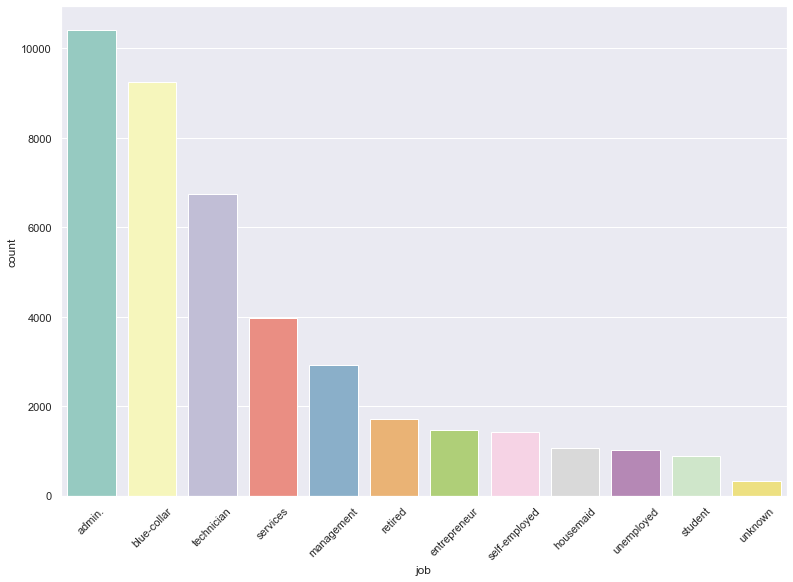

In [139]:
# TASK >>> Create a countplot of 'job' variable to see client´s job and corresponding counts
#      >>> Order counts from the most common job
#      >>> Set the rotation of x-axis tick labels to 45 degrees using Matplotlib´s xticks()
#      >>> Set a color palette to 'Set3'
sns.countplot(data = data, x = 'job', order = data.job.value_counts(ascending = False).index, palette = 'Set3')
plt.xticks(rotation = 45);

Now we´ll look at how many call have been performed during respective months. We are missing January in the dataset for some reason, but don´t worry about it. To correctly visualize the months of the year we need to specify their order. **checknut ci je tento koncept spomenuty v predoslych ntb**

In [149]:
month_order = ['February','March','April','May','Jun','Jul','August','September','October','November','December']

In [150]:
order_cat = pd.api.types.CategoricalDtype(categories = month_order, ordered = True)

In [151]:
data.month = data.month.astype(order_cat)

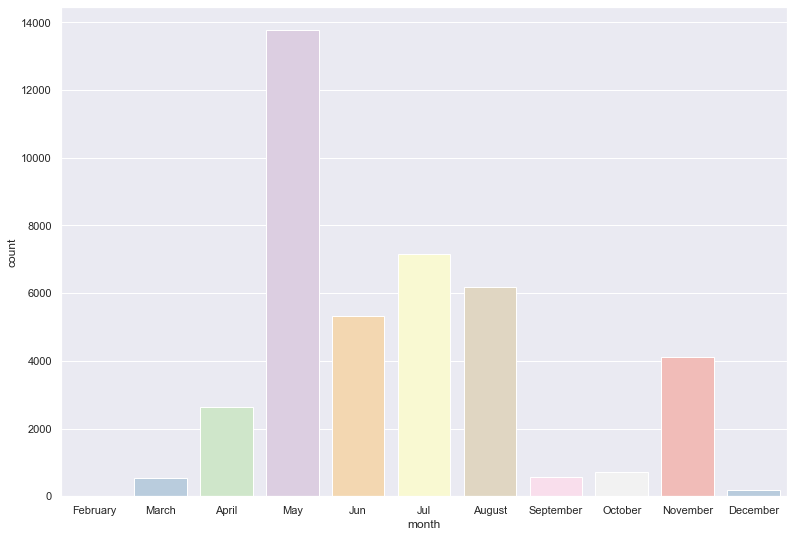

In [154]:
# TASK >>> Create a countplot of 'month' variable to see how many call have been performed trhough months
sns.countplot(data = data, x = 'month', palette ='Pastel1');

# 4. Wordcloud

Default of credit card clients dataset: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients